In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

In [5]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [6]:
class_names =['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
test_images.shape

(10000, 28, 28)

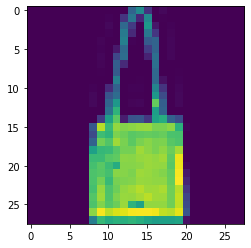

In [10]:
plt.imshow(np.squeeze(train_images[200]))

In [11]:
train_labels[200]

8

<function matplotlib.pyplot.show(*args, **kw)>

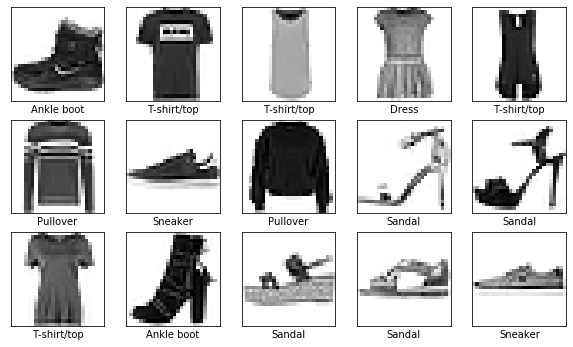

In [13]:
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show

In [16]:
train_images = train_images.reshape((60000, 28,28,1))
test_images = test_images.reshape((10000, 28, 28, 1))

In [17]:
train_images_norm = train_images / 255.0
test_images_norm = test_images / 255.0

In [18]:
conv1 = layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1), padding='same')

In [19]:
conv2 = layers.Conv2D(64, (3,3), activation='relu')

In [20]:
conv3 = layers.Conv2D(128, (3,3,), activation='relu')

In [21]:
max1 = layers.MaxPooling2D((2,2))
max2 = layers.MaxPooling2D((2,2))
max3 = layers.MaxPooling2D((2,2))

In [22]:
flat_layer = layers.Flatten()

In [23]:
fc = layers.Dense(128, activation='relu')

In [24]:
output = layers.Dense(10, activation='softmax')

In [25]:
model = models.Sequential()
model.add(conv1)
model.add(conv2)
model.add(conv3)
model.add(max1)
model.add(flat_layer)
model.add(fc)
model.add(output)

Instructions for updating:
Colocations handled automatically by placer.


In [26]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [29]:
md_fit = model.fit(train_images_norm, train_labels,
                  validation_data=(test_images_norm, test_labels),
                  epochs=10,
                  batch_size=1223)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1564s 26ms/sample - loss: 0.5595 - acc: 0.7968 - val_loss: 0.4537 - val_acc: 0.8349
Epoch 2/10
60000/60000 [==============================] - 1860s 31ms/sample - loss: 0.3689 - acc: 0.8689 - val_loss: 0.3496 - val_acc: 0.8772
Epoch 3/10
60000/60000 [==============================] - 1312s 22ms/sample - loss: 0.3053 - acc: 0.8924 - val_loss: 0.3292 - val_acc: 0.8769
Epoch 4/10
60000/60000 [==============================] - 1270s 21ms/sample - loss: 0.2714 - acc: 0.9024 - val_loss: 0.2903 - val_acc: 0.8984
Epoch 5/10
60000/60000 [==============================] - 1194s 20ms/sample - loss: 0.2440 - acc: 0.9122 - val_loss: 0.3040 - val_acc: 0.8954
Epoch 6/10
60000/60000 [==============================] - 1223s 20ms/sample - loss: 0.2208 - acc: 0.9204 - val_loss: 0.2872 - val_acc: 0.9006
Epoch 7/10
60000/60000 [==============================] - 1266s 21ms/sample - loss: 0.2131 - acc: 

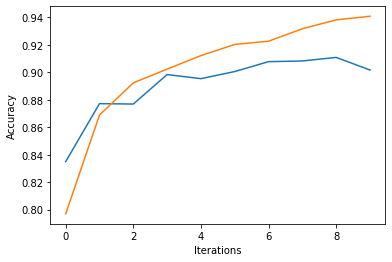

In [31]:
plt.plot(md_fit.history['val_acc'])
plt.plot(md_fit.history['acc'])
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.show()

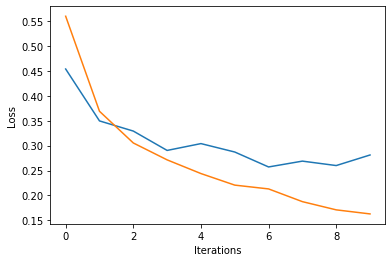

In [32]:
plt.plot(md_fit.history['val_loss'])
plt.plot(md_fit.history['loss'])
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()